# Lab 8 - Visualization


## Due: Thursday, Nov 1, 2018, 11:59:00pm

### Submission instructions
After completing this homework, you will turn in two files via Canvas ->  Assignments -> Lab 8:
- Your Notebook, named si330-lab8-YOUR_UNIQUE_NAME.ipynb and
- the HTML file, named si330-lab8-YOUR_UNIQUE_NAME.html

### Name:  Samantha Cohen
### Uniqname: samcoh
### People you worked with: "I worked by myself"


## Objectives
After completing this Lab, you should know how to use Altair to:
* Create basic visualizations
* Combine visualization building blocks into complex visualizations

## Setup

In [1]:
import numpy as np
import pandas as pd
import altair as alt

## Part 0: Load data

First, we'll read in the `movies.json` file as a Pandas data frame. We can do that using the `read_json` function:

In [2]:
movies = pd.read_json("movies.json")
movies.head()

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross
0,Fantasy,None,20th Century Fox,5.3,16056.0,None,Horror,7000000,31-Jul-92,32.0,NaN,Original Screenplay,Buffy the Vampire Slayer,NaN,14231669.0,14231669.0
1,Contemporary Fiction,None,Link Productions Ltd.,7.0,7129.0,Not Rated,Comedy,16000000,25-Jul-08,NaN,109.0,Original Screenplay,Bienvenue chez les Ch'tis,NaN,1470856.0,243470856.0
2,None,None,20th Century Fox,5.7,4626.0,None,Comedy,1000000,1-Jan-70,68.0,NaN,Original Screenplay,Beyond the Valley of the Dolls,NaN,9000000.0,9000000.0
3,None,None,None,6.4,399.0,R,Drama,600000,2-Jul-99,NaN,NaN,Original Screenplay,Broken Vessels,NaN,15030.0,85343.0
4,None,Franklin J. Schaffner,20th Century Fox,7.0,8741.0,None,Thriller/Suspense,12000000,1978-01-01,65.0,NaN,Based on Book/Short Story,The Boys from Brazil,NaN,19000000.0,19000000.0


This dataset contains a large number of movies, along with various properties of those movies, like worldwide gross, budget, directory, genre, and IMDB rating. We'll visualize a few of these properties.

## Part 1: Plot IMDB_Rating and Major_Genre

Altair is a powerful visualization toolkit for python with [extensive documentation](https://altair-viz.github.io/index.html). Altair is built on top of [Vega-Lite](https://vega.github.io/vega-lite/), a JavaScript visualization library that is based on the grammar of graphics. In this lab, we will use it to visualize some things!

### Q1.1 - IMDB Rating by Major Genre

Let's start by making a scatterplot of the IMDB rating against the major genre of each movie.

If we were talking **abstractly**, in the grammar of graphics, we might say something like:

- Encode **Major Genre** in the **x position**
- Encode **IMDB Rating** in the **y position**
- Use a **point** as the **mark** to draw with

This translates pretty straightforwardly into how you write Altair code. To see an example, check out the slides from lecture or this scatterplot example in the Altair documentation: https://altair-viz.github.io/gallery/simple_scatter.html

Then, write a specification for the chart below:

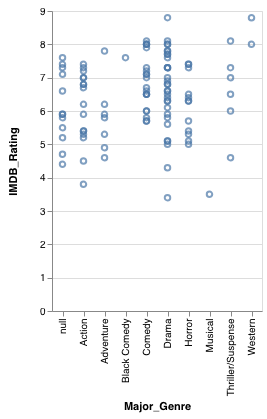

In [3]:
genre_rating=alt.Chart(movies).mark_point().encode(
    x= 'Major_Genre',
    y='IMDB_Rating'
)
genre_rating

### Q1.2 - Setting chart properties

The Altair API is designed so that you can chain method calls together in order to change chart properties or build more complex charts. For example, you can add a call to `.properties()` to change the width and height of your chart. 

Repeat question 1.1, but add a call to `.properties()`, passing `width` and `height` arguments to change your chart to be `400` pixels wide and `200` pixels high:

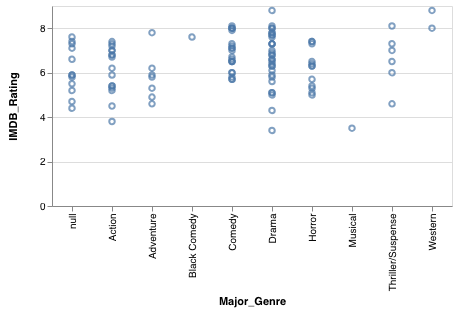

In [4]:
genre_rating_properties = alt.Chart(movies).mark_point().encode(
    x= 'Major_Genre',
    y='IMDB_Rating'
).properties(width=400, height=200)
genre_rating_properties 

### Q1.3 - **Mean** of IMDB Rating by Major Genre



To encode the mean of something, you can use Altair's [binning and aggregation](https://altair-viz.github.io/user_guide/encoding.html#binning-and-aggregation) functions.

For example, say you had column `foo` that you had encoded on the `y` position:

```python
...encode(
    y = 'foo',
    ...
)
```

You could instead encode the **mean** of `foo` by doing this:

```python
...encode(
    y = 'mean(foo)',
    ...
)
```

Or this:

```python
...encode(
    y = alt.Y('foo', aggregate = 'mean'),
    ...
)
```

You can find a list of the aggregation functions in a table on [this page](https://altair-viz.github.io/user_guide/encoding.html#binning-and-aggregation).

Given the above, let's visualize the **mean** of IMDB rating of each major genre,  i.e.:

- Encode **Major Genre** in the **x position**
- Encode the **mean** of **IMDB Rating** in the **y position**
- Use a **line** as the **mark** to draw with

Write a specification for the chart below:

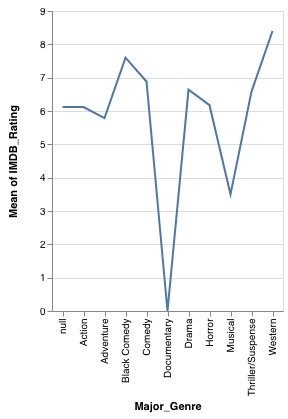

In [5]:
mean_rating_chart =alt.Chart(movies).mark_line().encode(
    x= 'Major_Genre',
    y=alt.Y('IMDB_Rating', aggregate = 'mean')
)
mean_rating_chart

## Part 2: Layering

### Q1.4a - Simple layering

In practice, instead of having two different charts that share the same x and y axis, we might want to combine them by overlaying the two charts together.

You can do this by **layering** two charts. To do that, simply add the two charts together using `+`, or pass both charts to the `alt.layer()` function (for more information, see the [layering documentation](https://altair-viz.github.io/user_guide/compound_charts.html#layered-charts)).

Create a chart that layers your chart from **Q1.3** (mean of IMDB rating by major genre) on top of your chart from **Q1.1** in order to show the means and the raw data at the same time.

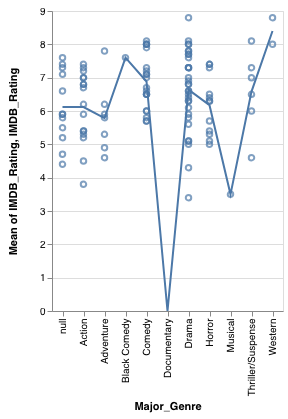

In [6]:
layer_two_charts = mean_rating_chart + genre_rating
layer_two_charts

### Q1.4b - Filtering

(In the interests of time for the lab, we'll do this part for you --- but you should read this code and understand it!)

One advantage of visualization is that it can make problems in the data stand out --- for example, the fact that several genres above don't have a lot of observations. Let's filter out genres with only 1 or 2 observations. 

First, we'll use `value_count` to get a count of the number of movies in each genre:

In [7]:
genre_counts = movies['Major_Genre'].value_counts()
genre_counts

Drama                31
Comedy               20
Action               17
Horror               12
Adventure             7
Thriller/Suspense     6
Western               2
Black Comedy          1
Musical               1
Documentary           1
Name: Major_Genre, dtype: int64

We can use this to get a boolean vector indexing all the genres with count greater than 2:

In [8]:
genre_counts > 2

Drama                 True
Comedy                True
Action                True
Horror                True
Adventure             True
Thriller/Suspense     True
Western              False
Black Comedy         False
Musical              False
Documentary          False
Name: Major_Genre, dtype: bool

We can then use this to get the name of those genres (the index of the genre_counts series):

In [9]:
genres_to_keep = genre_counts[genre_counts > 2].index
genres_to_keep

Index(['Drama', 'Comedy', 'Action', 'Horror', 'Adventure',
       'Thriller/Suspense'],
      dtype='object')

Then we can filter the movies dataset to only those in the list of genres we want to keep:

In [10]:
movies_filtered = movies[movies['Major_Genre'].isin(genres_to_keep)]

### Q1.4c - Once again, with filtered data

Repeat Q1.4a, but with the filtered dataset:

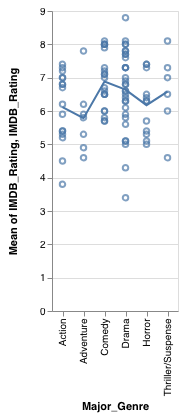

In [11]:
alt.layer(
    alt.Chart(movies_filtered).mark_line().encode(
    x= 'Major_Genre',
    y=alt.Y('IMDB_Rating', aggregate = 'mean')),
    alt.Chart(movies_filtered).mark_point().encode(
    x= 'Major_Genre',
    y='IMDB_Rating')
)

### Q1.5 - Adding color

You can use multiple channels (x/y position, color, etc) within a single call to `encode()`.

Create a chart similar to **Q1.4c**, but assign the `Major_Genre` to `color` in addition to `x` position so that the points are colored according to their genre.


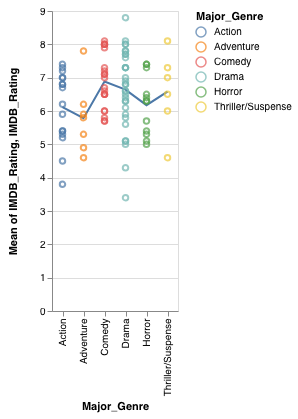

In [12]:
alt.Chart(movies_filtered).mark_line().encode(
    x = alt.X('Major_Genre'),
    y = alt.Y('IMDB_Rating', aggregate = 'mean')
)+ alt.Chart(movies_filtered).mark_point().encode(
    x= 'Major_Genre',
    y='IMDB_Rating',
    color = 'Major_Genre'
)



In [13]:
# base = alt.Chart(movies_filtered).encode(x = "Major_Genre")
# alt.layer(
#     base.mark_point().encode(y = 'IMDB_Rating', color ="Major_Genre" ),
#     base.mark_line().encode(y = 'mean(IMDB_Rating)')

# )

### Q1.6 - IMDB versus rotten tomatoes

Now make a plot from `movies_filtered` with:
- `IMDB_Rating` encoded as **x position**
- `Rotten_Tomatoes_Rating` encoded as **y position**
- `Major_Genre` encoded as **color**
And use **point** as the **mark**.

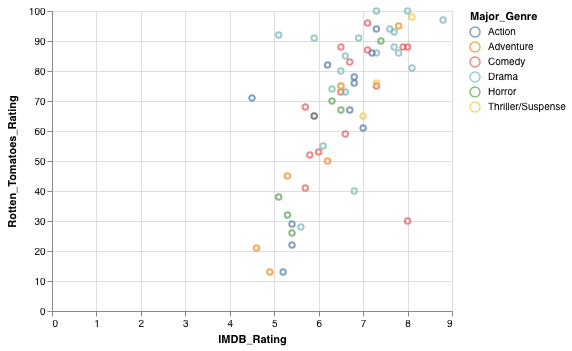

In [14]:
alt.Chart(movies_filtered).mark_point().encode(
    x = alt.X('IMDB_Rating'),
    y = alt.Y('Rotten_Tomatoes_Rating'),
    color = 'Major_Genre'
) 

### Q1.7 - Genre counts

Now make a plot from `movies_filtered` with:
- `Major_Genre` encoded as **y position**
- The **count** of `Major_Genre` encoded as **y position**
- `Major_Genre` encoded as **color**
And use **bar** as the **mark**.

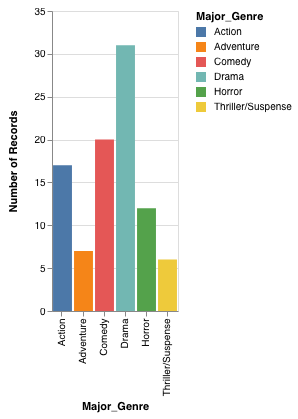

In [15]:
alt.Chart(movies_filtered).mark_bar().encode(
    x = alt.X('Major_Genre'),
    y = 'count(Major_Genre)',
    color = alt.Color('Major_Genre')
) 

## BONUS

Read [this page](https://altair-viz.github.io/gallery/selection_histogram.html), then combine your charts from **Q1.6** and **Q1.7** into a single linked chart, where selecting points in the scatterplot interactively updates the bar chart.

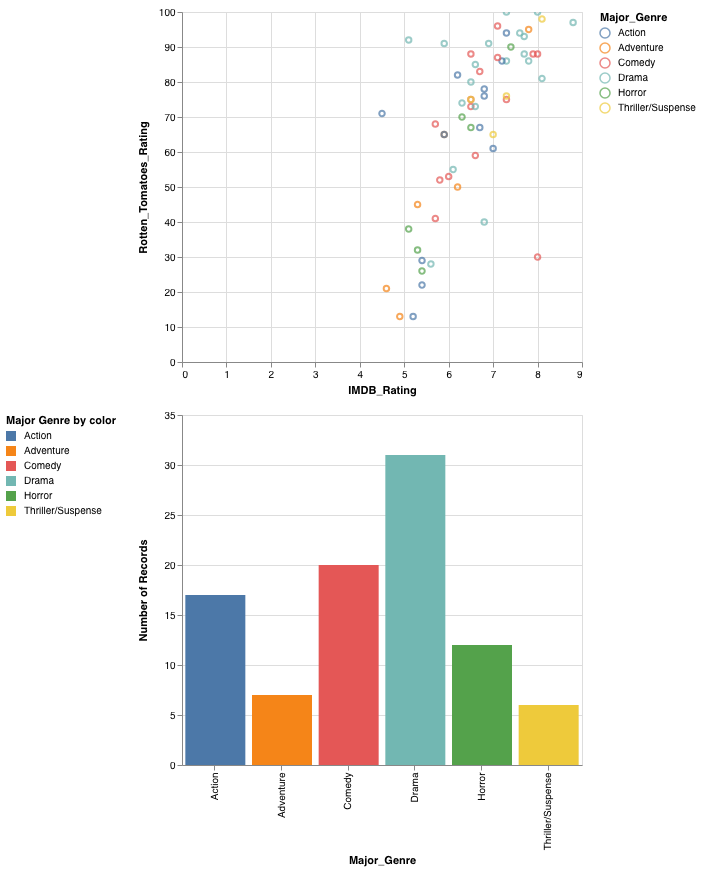

In [16]:
selector = alt.selection_single(fields=['Major_Genre'])

base = alt.Chart(movies_filtered).properties(
    height= 350,
    width = 400
).add_selection(selector)


scatter =base.mark_point().encode(
    x = alt.X('IMDB_Rating'),
    y = alt.Y('Rotten_Tomatoes_Rating'),
    color = alt.Color('Major_Genre',legend =alt.Legend(orient="right"))
).interactive() 

bar= base.mark_bar().encode(
    x = alt.X('Major_Genre'),
    y = 'count()',
    color = alt.Color('Major_Genre',legend = alt.Legend(title="Major Genre by color",orient="left"))
).transform_filter(selector)

combo=alt.vconcat(scatter, bar)
combo
# alt.layer(
#     alt.Chart(movies_filtered).mark_point().encode(
#     x = alt.X('IMDB_Rating'),
#     y = alt.Y('Rotten_Tomatoes_Rating'),
#     color = alt.Color('Major_Genre',legend =alt.Legend(orient="right"))
#     )
#     ,
#     alt.Chart(movies_filtered).mark_bar().encode(
#     x = alt.X('Major_Genre'),
#     y = 'count()',
#     color = alt.Color('Major_Genre',legend = alt.Legend(title="Major Genre by color",orient="left"))
#     ).transform_filter(selector)
# ).properties(height= 500,width=700)

In [17]:
# import altair as alt
# from vega_datasets import data

# cars = data.cars.url

# brush = alt.selection(type='interval')

# points = alt.Chart().mark_point().encode(
#      x = alt.X('IMDB_Rating'),
#     y = alt.Y('Rotten_Tomatoes_Rating'),
#     color = alt.Color('Major_Genre',legend =alt.Legend(orient="right")),
#     color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
# ).add_selection(
#     brush
# )

# bars = alt.Chart().mark_bar().encode(
#     y='Origin:N',
#     color='Origin:N',
#     x='count(Origin):Q'
# ).transform_filter(
#     brush
# )

# alt.vconcat(points, bars, data=cars)